In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
base = pd.read_csv('insurance.csv')
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [3]:
base = base.drop(columns=['Unnamed: 0'])
base

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [4]:
base.shape

(20000, 27)

In [5]:
# Preenche valores NaN com a moda das colunas categóricas
for col in base.select_dtypes(include='object').columns:
    base[col] = base[col].fillna(base[col].mode()[0])

In [6]:
# Transforma variáveis categóricas em numéricas
label_encoder = LabelEncoder()
for col in base.select_dtypes(include='object').columns:
    base[col] = label_encoder.fit_transform(base[col])

In [7]:
# Separa as variáveis independentes e dependente
y = base.iloc[:, 7]
x = base.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]].values

In [8]:
x

array([[False, 1, 1, ..., False, 3, 0],
       [False, 2, 1, ..., True, 3, 2],
       [False, 2, 2, ..., True, 3, 1],
       ...,
       [False, 2, 2, ..., True, 3, 2],
       [False, 1, 0, ..., True, 3, 2],
       [False, 1, 0, ..., True, 3, 2]], dtype=object)

In [9]:
# x independentes
# y a variável dependente
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
# Treina o modelo
modelo = GaussianNB()
modelo.fit(x_treinamento, y_treinamento)

GaussianNB()

In [11]:
previsoes = modelo.predict(x_teste)

In [12]:
previsoes

array([1, 2, 2, ..., 1, 2, 2])

In [13]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}', f'Precisão: {precision}', f'Recall: {recall}', f'F1: {f1}', sep='\n')

Acuracia: 0.7676666666666667
Precisão: 0.8957226059721616
Recall: 0.7676666666666667
F1: 0.8015338312265129


In [14]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

           0       0.49      0.84      0.61       553
           1       0.33      0.92      0.49       473
           2       1.00      0.75      0.85      4974

    accuracy                           0.77      6000
   macro avg       0.60      0.83      0.65      6000
weighted avg       0.90      0.77      0.80      6000



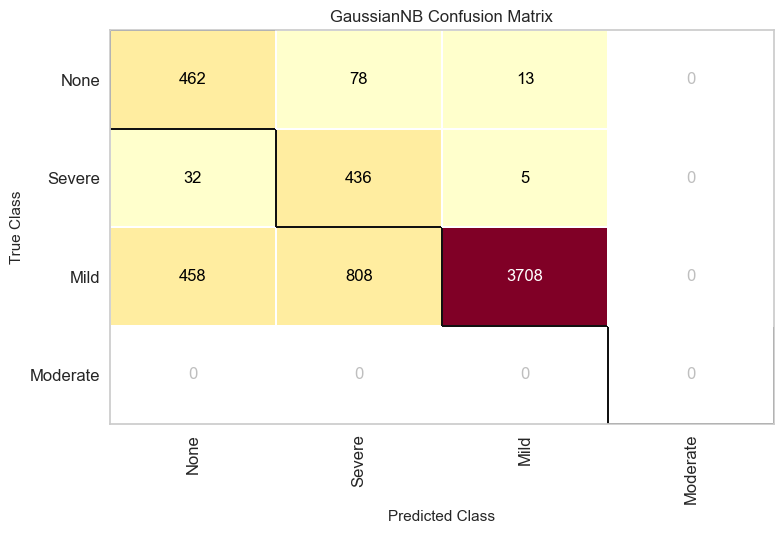

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [15]:
confusao = ConfusionMatrix(modelo, classes=['None', 'Severe', 'Mild', 'Moderate'])
confusao.fit(x_treinamento, y_treinamento)
confusao.score(x_teste, y_teste)
confusao.poof()